In [1]:
#!pip install pyspark
%pip install scikit-learn
%pip install sklearn
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
#from sklearn.metrics import confusion_matrix
#from pyspark.sql.functions import *
#from pyspark.sql import SparkSession
#from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, VectorSlicer
#from pyspark.ml.functions import vector_to_array
#from pyspark.sql.functions import col, to_date, year, to_timestamp, month, lit
#from pyspark.sql.functions import countDistinct 
#from pyspark.sql.functions import when


Note: you may need to restart the kernel to use updated packages.



In [2]:
#Location of train and test files
#data_loc = "C:/Users/Y9FHP3726/Desktop/DiplomaThesis/Datasets/preprocessed_data_cust_code_date_formatted.csv"
data_loc = 'C:/Users/Y9FHP3726/Desktop/ANDREAS/DiplomaThesis/Datasets/preprocessed_data_cust_code_date_formatted.csv'

# read the CSV file into a Pandas DataFrame
dataset = pd.read_csv(data_loc)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(dataset.head(10))


C:\Users\Y9FHP3726\AppData\Local\Temp\ipykernel_21416\2258342537.py:6: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(data_loc)


   fetch_date  cust_code country sex age new_cust cust_seniority indrel  \
0  2015-01-28  1375586.0       1   1  35        0              6      1   
1  2015-01-28  1050614.0       1   0  23        0             35      1   
2  2015-01-28  1050617.0       1   1  23        0             35      1   
3  2015-01-28  1050623.0       1   1  23        0             35      1   
4  2015-01-28  1050624.0       1   1  65        0             35      1   
5  2015-01-28  1050625.0       1   0  23        0             35      1   
6  2015-01-28  1050626.0       1   0  23        0             35      1   
7  2015-01-28  1050610.0       1   0  24        0             35      1   
8  2015-01-28  1050609.0       1   1  22        0             35      1   
9  2015-01-28  1050582.0       1   0  28        0             35      1   

  residence_index foreigner_index deceased activity_index     income  \
0               1               0        0              1    87218.1   
1               1             

In [3]:
print(len(dataset))

6137217


In [4]:
dataset = dataset.dropna()

In [5]:
print(len(dataset))

6137115


# **apo edw kai katw koitazw diafora aspects gia kathe column tou dataset**

In [6]:
'''
#INFO GIA XWRES
country_df=dataset.select('country').filter(col("country") != lit("ES"))
distinct_value_count = country_df.select(countDistinct("country")).first()[0]
print(distinct_value_count)'''

'\n#INFO GIA XWRES\ncountry_df=dataset.select(\'country\').filter(col("country") != lit("ES"))\ndistinct_value_count = country_df.select(countDistinct("country")).first()[0]\nprint(distinct_value_count)'

In [7]:
'''
#INFO GIA EMP_INDEX
emp_index_df=dataset.select('emp_index')
distinct_value_count = emp_index_df.select(countDistinct("emp_index")).first()[0]
print(distinct_value_count)
emp_index_df=dataset.select('emp_index').distinct().filter(col("emp_index")!= lit('N'))
emp_index_df.show()
'''


'\n#INFO GIA EMP_INDEX\nemp_index_df=dataset.select(\'emp_index\')\ndistinct_value_count = emp_index_df.select(countDistinct("emp_index")).first()[0]\nprint(distinct_value_count)\nemp_index_df=dataset.select(\'emp_index\').distinct().filter(col("emp_index")!= lit(\'N\'))\nemp_index_df.show()\n'

In [8]:
'''#INFO GIA sex
sex_df=dataset.select('sex')
distinct_value_count = sex_df.select(countDistinct("sex")).first()[0]
print(distinct_value_count)
#sex_df=dataset.select('sex').distinct().filter(col("emp_index")!= lit('N'))
#sex_df.show()'''

'#INFO GIA sex\nsex_df=dataset.select(\'sex\')\ndistinct_value_count = sex_df.select(countDistinct("sex")).first()[0]\nprint(distinct_value_count)\n#sex_df=dataset.select(\'sex\').distinct().filter(col("emp_index")!= lit(\'N\'))\n#sex_df.show()'

In [9]:
'''#INFO GIA new_cust
new_cust_df=dataset.select('new_cust')
distinct_value_count = new_cust_df.select(countDistinct("new_cust")).first()[0]
print(distinct_value_count)
new_cust_df=dataset.select('new_cust').distinct()
new_cust_df.show()'''

'#INFO GIA new_cust\nnew_cust_df=dataset.select(\'new_cust\')\ndistinct_value_count = new_cust_df.select(countDistinct("new_cust")).first()[0]\nprint(distinct_value_count)\nnew_cust_df=dataset.select(\'new_cust\').distinct()\nnew_cust_df.show()'

In [10]:
'''#INFO GIA cust_seniority
cust_seniority_df=dataset.select('cust_seniority')
distinct_value_count = cust_seniority_df.select(countDistinct("cust_seniority")).first()[0]
print(distinct_value_count)
cust_seniority_df=dataset.select('cust_seniority').distinct()
cust_seniority_df.show()'''

'#INFO GIA cust_seniority\ncust_seniority_df=dataset.select(\'cust_seniority\')\ndistinct_value_count = cust_seniority_df.select(countDistinct("cust_seniority")).first()[0]\nprint(distinct_value_count)\ncust_seniority_df=dataset.select(\'cust_seniority\').distinct()\ncust_seniority_df.show()'

In [11]:
'''#INFO GIA indrel
indrel=dataset.select('indrel')
distinct_value_count = indrel.select(countDistinct("indrel")).first()[0]
print(distinct_value_count)
indrel=dataset.select('indrel').distinct()
indrel.show()'''

'#INFO GIA indrel\nindrel=dataset.select(\'indrel\')\ndistinct_value_count = indrel.select(countDistinct("indrel")).first()[0]\nprint(distinct_value_count)\nindrel=dataset.select(\'indrel\').distinct()\nindrel.show()'

In [12]:
'''#INFO GIA last_date_as_primary
last_date_as_primary=dataset.select('last_date_as_primary')
distinct_value_count = last_date_as_primary.select(countDistinct("last_date_as_primary")).first()[0]
print(distinct_value_count)
last_date_as_primary=dataset.select('last_date_as_primary').distinct()
last_date_as_primary.show()'''

'#INFO GIA last_date_as_primary\nlast_date_as_primary=dataset.select(\'last_date_as_primary\')\ndistinct_value_count = last_date_as_primary.select(countDistinct("last_date_as_primary")).first()[0]\nprint(distinct_value_count)\nlast_date_as_primary=dataset.select(\'last_date_as_primary\').distinct()\nlast_date_as_primary.show()'

In [13]:
'''#INFO GIA cust_type
cust_type=dataset.select('cust_type')
distinct_value_count = cust_type.select(countDistinct("cust_type")).first()[0]
print(distinct_value_count)
cust_type=dataset.select('cust_type').distinct()
cust_type.show() '''

'#INFO GIA cust_type\ncust_type=dataset.select(\'cust_type\')\ndistinct_value_count = cust_type.select(countDistinct("cust_type")).first()[0]\nprint(distinct_value_count)\ncust_type=dataset.select(\'cust_type\').distinct()\ncust_type.show() '

In [14]:
'''#INFO GIA cust_rel
cust_rel=dataset.select('cust_rel')
distinct_value_count = cust_rel.select(countDistinct("cust_rel")).first()[0]
print(distinct_value_count)
cust_rel=dataset.select('cust_rel').distinct()
cust_rel.show() '''

'#INFO GIA cust_rel\ncust_rel=dataset.select(\'cust_rel\')\ndistinct_value_count = cust_rel.select(countDistinct("cust_rel")).first()[0]\nprint(distinct_value_count)\ncust_rel=dataset.select(\'cust_rel\').distinct()\ncust_rel.show() '

In [15]:
''' #INFO GIA residence_index
residence_index=dataset.select('residence_index')
distinct_value_count = residence_index.select(countDistinct("residence_index")).first()[0]
print(distinct_value_count)
residence_index=dataset.select('residence_index').distinct()
residence_index.show() '''

' #INFO GIA residence_index\nresidence_index=dataset.select(\'residence_index\')\ndistinct_value_count = residence_index.select(countDistinct("residence_index")).first()[0]\nprint(distinct_value_count)\nresidence_index=dataset.select(\'residence_index\').distinct()\nresidence_index.show() '

In [16]:
 '''#INFO GIA foreigner_index
foreigner_index=dataset.select('foreigner_index')
distinct_value_count = foreigner_index.select(countDistinct("foreigner_index")).first()[0]
print(distinct_value_count)
foreigner_index=dataset.select('foreigner_index').distinct()
foreigner_index.show() '''

'#INFO GIA foreigner_index\nforeigner_index=dataset.select(\'foreigner_index\')\ndistinct_value_count = foreigner_index.select(countDistinct("foreigner_index")).first()[0]\nprint(distinct_value_count)\nforeigner_index=dataset.select(\'foreigner_index\').distinct()\nforeigner_index.show() '

In [17]:
 '''#INFO GIA spouse_index
spouse_index=dataset.select('spouse_index')
distinct_value_count = spouse_index.select(countDistinct("spouse_index")).first()[0]
print(distinct_value_count)
spouse_index=dataset.select('spouse_index').distinct()
spouse_index.show() '''

'#INFO GIA spouse_index\nspouse_index=dataset.select(\'spouse_index\')\ndistinct_value_count = spouse_index.select(countDistinct("spouse_index")).first()[0]\nprint(distinct_value_count)\nspouse_index=dataset.select(\'spouse_index\').distinct()\nspouse_index.show() '

In [18]:
 '''#INFO GIA joining_channel
joining_channel=dataset.select('joining_channel')
distinct_value_count = joining_channel.select(countDistinct("joining_channel")).first()[0]
print(distinct_value_count)
joining_channel=dataset.select('joining_channel').distinct()
joining_channel.show() '''

'#INFO GIA joining_channel\njoining_channel=dataset.select(\'joining_channel\')\ndistinct_value_count = joining_channel.select(countDistinct("joining_channel")).first()[0]\nprint(distinct_value_count)\njoining_channel=dataset.select(\'joining_channel\').distinct()\njoining_channel.show() '

In [19]:
 '''#INFO GIA deceased
deceased=dataset.select('deceased')
distinct_value_count = deceased.select(countDistinct("deceased")).first()[0]
print(distinct_value_count)
deceased=dataset.select('deceased').distinct()
deceased.show() '''

'#INFO GIA deceased\ndeceased=dataset.select(\'deceased\')\ndistinct_value_count = deceased.select(countDistinct("deceased")).first()[0]\nprint(distinct_value_count)\ndeceased=dataset.select(\'deceased\').distinct()\ndeceased.show() '

In [20]:
 '''#INFO GIA address_type
address_type=dataset.select('address_type')
distinct_value_count = address_type.select(countDistinct("address_type")).first()[0]
print(distinct_value_count)
address_type=dataset.select('address_type').distinct()
address_type.show() '''

'#INFO GIA address_type\naddress_type=dataset.select(\'address_type\')\ndistinct_value_count = address_type.select(countDistinct("address_type")).first()[0]\nprint(distinct_value_count)\naddress_type=dataset.select(\'address_type\').distinct()\naddress_type.show() '

In [21]:
 '''#INFO GIA prov_code
prov_code=dataset.select('prov_code')
distinct_value_count = prov_code.select(countDistinct("prov_code")).first()[0]
print(distinct_value_count)
prov_code=dataset.select('prov_code').distinct()
prov_code.show() '''

'#INFO GIA prov_code\nprov_code=dataset.select(\'prov_code\')\ndistinct_value_count = prov_code.select(countDistinct("prov_code")).first()[0]\nprint(distinct_value_count)\nprov_code=dataset.select(\'prov_code\').distinct()\nprov_code.show() '

In [22]:
 '''#INFO GIA activity_index
activity_index=dataset.select('activity_index')
distinct_value_count = activity_index.select(countDistinct("activity_index")).first()[0]
print(distinct_value_count)
activity_index=dataset.select('activity_index').distinct()
activity_index.show() '''

'#INFO GIA activity_index\nactivity_index=dataset.select(\'activity_index\')\ndistinct_value_count = activity_index.select(countDistinct("activity_index")).first()[0]\nprint(distinct_value_count)\nactivity_index=dataset.select(\'activity_index\').distinct()\nactivity_index.show() '

# **apo edw kai katw ksekinaw na ftiaxnw to dataset gia to peirama me to proion pou tha eisagei o xrhsths**


In [23]:
product = input("What product should I use to test the model? \n  or in other words, for which product should I make predict whether or not the users will have by the end of the next month? \n please type one of the following: \n savings_account, guarentees, current_account, derivative_account, payroll_account, \n junior_account, mas_account, perticular_account, perticular_plus, st_deposit, \n mt_deposits, lt_deposits, e_account, funds, mortgage, \n pension, loan, tax, credit_card, securities, \n home_account, payroll, pension2, direct_debit ")
print(type(product))
'''columns_to_drop=[
'savings_account',
 'guarentees', 
 'current_account',
 'derivative_account',
 'payroll_account',
 'junior_account', 
 'mas_account',
 'perticular_account',
 'perticular_plus',
 'st_deposit', 
 'mt_deposits',
 'lt_deposits',
 'e_account',
 'funds',
 'mortgage', 
 'pension', 
 'loan',
 'tax', 
 'credit_card',
 'securities',
 'home_account',
 'payroll',
 'pension2', 
 'direct_debit']
columns_to_drop.remove(product)'''


#ftiaxnw data
#data=dataset.drop(columns=columns_to_drop) 
data=dataset
print('The  columns in data are\n',list(data.columns))
print('The no of columns in data are\n',len(data.columns))

<class 'str'>
The  columns in data are
 ['fetch_date', 'cust_code', 'country', 'sex', 'age', 'new_cust', 'cust_seniority', 'indrel', 'residence_index', 'foreigner_index', 'deceased', 'activity_index', 'income', 'savings_account', 'guarentees', 'current_account', 'derivative_account', 'payroll_account', 'junior_account', 'mas_account', 'perticular_account', 'perticular_plus', 'st_deposit', 'mt_deposits', 'lt_deposits', 'e_account', 'funds', 'mortgage', 'pension', 'loan', 'tax', 'credit_card', 'securities', 'home_account', 'payroll', 'pension2', 'direct_debit', 'emp_index_D', 'emp_index_B', 'emp_index_C', 'emp_index_A', 'emp_index_E', 'cust_type_1', 'cust_type_3', 'cust_type_2', 'cust_rel_I', 'cust_rel_A', 'cust_rel_P', 'segmentation_2', 'segmentation_3', 'segmentation_1']
The no of columns in data are
 51


# **APO AUTO TO CELL kai katw TREKSE GIA NA ALLAZEIS TIS PARAMETERS TOU ALGORITHM**

In [24]:
print(dataset.dtypes)

fetch_date            object
cust_code             object
country               object
sex                   object
age                   object
new_cust              object
cust_seniority        object
indrel                object
residence_index       object
foreigner_index       object
deceased              object
activity_index        object
income                object
savings_account       object
guarentees            object
current_account       object
derivative_account    object
payroll_account       object
junior_account        object
mas_account           object
perticular_account    object
perticular_plus       object
st_deposit            object
mt_deposits           object
lt_deposits           object
e_account             object
funds                 object
mortgage              object
pension               object
loan                  object
tax                   object
credit_card           object
securities            object
home_account          object
payroll       

In [25]:
#==============================================================================================================
#epilegw ws train ta rows tou data me fetch_date=2015-01-28
#epilegw ws test ta rows tou data me fetch_date=2015-02-28



train = data[data['fetch_date'] == "2015-01-28"]

test = data[data['fetch_date'] == "2015-02-28"]

print('train is:')
print(train.head(5))
print('============================================================================================================')


print('test is:')
print(test.head(5))
print('============================================================================================================')

train is:
   fetch_date  cust_code country sex age new_cust cust_seniority indrel  \
0  2015-01-28  1375586.0       1   1  35        0              6      1   
1  2015-01-28  1050614.0       1   0  23        0             35      1   
2  2015-01-28  1050617.0       1   1  23        0             35      1   
3  2015-01-28  1050623.0       1   1  23        0             35      1   
4  2015-01-28  1050624.0       1   1  65        0             35      1   

  residence_index foreigner_index deceased activity_index     income  \
0               1               0        0              1    87218.1   
1               1               0        0              1        0.0   
2               1               0        0              1  113316.66   
3               1               0        0              1  113538.81   
4               1               0        0              1   61605.09   

  savings_account guarentees current_account derivative_account  \
0               0          0           

# **sto apo katw cell kanw inner join panw sto cust code ta 2 dfs opou to ena exei fetch_date=2015-01-28 kai to allo exei fetch_date=2015-02-28 prokeimenou na sumperilavw sto peirama pelates pou uparxoun kai tous 2 mhnes kai ara exei aksia h provlepsi**

In [26]:
merged_df = pd.merge(train, test, on='cust_code', suffixes=('_train', '_test'))
print(merged_df.head(1))
print('============================================================================================================')
print(len(merged_df))

  fetch_date_train  cust_code country_train sex_train age_train  \
0       2015-01-28  1375586.0             1         1        35   

  new_cust_train cust_seniority_train indrel_train residence_index_train  \
0              0                    6            1                     1   

  foreigner_index_train deceased_train activity_index_train income_train  \
0                     0              0                    1      87218.1   

  savings_account_train guarentees_train current_account_train  \
0                     0                0                     1   

  derivative_account_train payroll_account_train junior_account_train  \
0                        0                     0                    0   

  mas_account_train perticular_account_train perticular_plus_train  \
0                 0                        0                     0   

  st_deposit_train mt_deposits_train lt_deposits_train e_account_train  \
0                0                 0                 0          

In [27]:
#ftiaxnw train
train= merged_df[['fetch_date_train',   
'cust_code', 
'country_train',
'sex_train',
'age_train', 
'new_cust_train',
'cust_seniority_train',
'indrel_train',
'residence_index_train',        
'foreigner_index_train',
'deceased_train',                       
'activity_index_train',
'income_train',
'savings_account_train',
'guarentees_train', 
'current_account_train',
'derivative_account_train',
'payroll_account_train',
'junior_account_train', 
'mas_account_train',
'perticular_account_train',
'perticular_plus_train',
'st_deposit_train', 
'mt_deposits_train',
'lt_deposits_train',
'e_account_train',
'funds_train',
'mortgage_train', 
'pension_train', 
'loan_train',
'tax_train', 
'credit_card_train',
'securities_train',
'home_account_train',
'payroll_train',
'pension2_train', 
'direct_debit_train',
'emp_index_D_train',
'emp_index_B_train',
'emp_index_C_train',
'emp_index_A_train', 
'emp_index_E_train', 
'cust_type_1_train', 
'cust_type_3_train', 
'cust_type_2_train',
'cust_rel_I_train',
'cust_rel_A_train',
'cust_rel_P_train', 
'segmentation_2_train', 
'segmentation_3_train', 
'segmentation_1_train'
]]
# rename all columns at once
train.columns = ['fetch_date',   
'cust_code', 
'country',
'sex',
'age', 
'new_cust',
'cust_seniority',
'indrel',
'residence_index',        
'foreigner_index',
'deceased',                       
'activity_index',
'income',
'savings_account',
'guarentees', 
'current_account',
'derivative_account',
'payroll_account',
'junior_account', 
'mas_account',
'perticular_account',
'perticular_plus',
'st_deposit', 
'mt_deposits',
'lt_deposits',
'e_account',
'funds',
'mortgage', 
'pension', 
'loan',
'tax', 
'credit_card',
'securities',
'home_account',
'payroll',
'pension2', 
'direct_debit',
'emp_index_D',
'emp_index_B',
'emp_index_C',
'emp_index_A', 
'emp_index_E', 
'cust_type_1', 
'cust_type_3', 
'cust_type_2',
'cust_rel_I',
'cust_rel_A',
'cust_rel_P', 
'segmentation_2', 
'segmentation_3', 
'segmentation_1']
print(train.head(2))
print('======================================================================================================')
print(len(train))

   fetch_date  cust_code country sex age new_cust cust_seniority indrel  \
0  2015-01-28  1375586.0       1   1  35        0              6      1   
1  2015-01-28  1050614.0       1   0  23        0             35      1   

  residence_index foreigner_index deceased activity_index   income  \
0               1               0        0              1  87218.1   
1               1               0        0              1      0.0   

  savings_account guarentees current_account derivative_account  \
0               0          0               1                  0   
1               0          0               1                  0   

  payroll_account junior_account mas_account perticular_account  \
0               0              0           0                  0   
1               0              0           0                  0   

  perticular_plus st_deposit mt_deposits lt_deposits e_account funds mortgage  \
0               0          0           0           0         0     0        0 

In [28]:
#ftiaxnw test
test= merged_df[['fetch_date_test',   
'cust_code', 
'country_test',
'sex_test',
'age_test', 
'new_cust_test',
'cust_seniority_test',
'indrel_test',
'residence_index_test',        
'foreigner_index_test',
'deceased_test',                       
'activity_index_test',
'income_test',
'savings_account_test',
'guarentees_test', 
'current_account_test',
'derivative_account_test',
'payroll_account_test',
'junior_account_test', 
'mas_account_test',
'perticular_account_test',
'perticular_plus_test',
'st_deposit_test', 
'mt_deposits_test',
'lt_deposits_test',
'e_account_test',
'funds_test',
'mortgage_test', 
'pension_test', 
'loan_test',
'tax_test', 
'credit_card_test',
'securities_test',
'home_account_test',
'payroll_test',
'pension2_test', 
'direct_debit_test',
'emp_index_D_test',
'emp_index_B_test',
'emp_index_C_test',
'emp_index_A_test', 
'emp_index_E_test', 
'cust_type_1_test', 
'cust_type_3_test', 
'cust_type_2_test',
'cust_rel_I_test',
'cust_rel_A_test',
'cust_rel_P_test', 
'segmentation_2_test', 
'segmentation_3_test', 
'segmentation_1_test']]
# rename all columns at once
test.columns = ['fetch_date',   
'cust_code', 
'country',
'sex',
'age', 
'new_cust',
'cust_seniority',
'indrel',
'residence_index',        
'foreigner_index',
'deceased',                       
'activity_index',
'income',
'savings_account',
'guarentees', 
'current_account',
'derivative_account',
'payroll_account',
'junior_account', 
'mas_account',
'perticular_account',
'perticular_plus',
'st_deposit', 
'mt_deposits',
'lt_deposits',
'e_account',
'funds',
'mortgage', 
'pension', 
'loan',
'tax', 
'credit_card',
'securities',
'home_account',
'payroll',
'pension2', 
'direct_debit',
'emp_index_D',
'emp_index_B',
'emp_index_C',
'emp_index_A', 
'emp_index_E', 
'cust_type_1', 
'cust_type_3', 
'cust_type_2',
'cust_rel_I',
'cust_rel_A',
'cust_rel_P', 
'segmentation_2', 
'segmentation_3', 
'segmentation_1']
print(test.head(2))
print('======================================================================================================')
print(len(test))

   fetch_date  cust_code country sex age new_cust cust_seniority indrel  \
0  2015-02-28  1375586.0       1   1  35        0              6      1   
1  2015-02-28  1050614.0       1   0  23        0             35      1   

  residence_index foreigner_index deceased activity_index   income  \
0               1               0        0              1  87218.1   
1               1               0        0              1      0.0   

  savings_account guarentees current_account derivative_account  \
0               0          0               1                  0   
1               0          0               1                  0   

  payroll_account junior_account mas_account perticular_account  \
0               0              0           0                  0   
1               0              0           0                  0   

  perticular_plus st_deposit mt_deposits lt_deposits e_account funds mortgage  \
0               0          0           0           0         0     0        0 

In [29]:
#apothikeuw se ena df pou to onomazw CUST_CODES_DF olous tous cust code tou test
#(profanws logw tou inner join prohgoumenws oi idioi akrivws cust_code uphrxan kai sto train) outws wste me to peras twn predictions, na tous ksanavalw
#se kathe grammh opws htan arxika gia na mporesw na dw sta predictions olous tous pelates pou
#sto train (date=2015-01-28) den eixan to proion 'product' kai to apekthsan sto test (date=2015-02-28)
#exw krathsei loipon se ena df pou to onomazw  CUST_CODES_0_1_DF olous osous sto train den eixan to proion kai to apekthsan sto test.
# Ara menei mono na dw posa predictions einai accurate apo tis times pou exei to teliko df pou tha exei kai cust code kai prediction gia ta
#cust code pou ginane ekanan 0->1 sto proion pou trexw

CUST_CODES_DF = pd.DataFrame(test['cust_code'])


In [30]:
print(CUST_CODES_DF.head(5))
print(len(CUST_CODES_DF))


   cust_code
0  1375586.0
1  1050614.0
2  1050617.0
3  1050623.0
4  1050624.0
312913


In [31]:
##edw thelw na vrw olous tous pelates pou sto train (date=2015-01-28) den eixan to proion 'product' kai to apekthsan sto test (date=2015-02-28)
###apothikeuw ta cust code se ena neo df pou to onomazw CUST_CODES_0_1_DF

train_custs = set(train[train[product] == 0]['cust_code'])
test_custs = set(test[test[product] == 1]['cust_code'])
result = train_custs.intersection(test_custs)
# Convert train_custs to DataFrame
train_custs_df = pd.DataFrame({'cust_code': list(train_custs)})
# Convert test_custs to DataFrame
test_custs_df = pd.DataFrame({'cust_code': list(test_custs)})
# Convert result to DataFrame
CUST_CODES_0_1_DF = pd.DataFrame({'cust_code': list(result)})
#print(train_custs_df)
print('=========================')
#print(test_custs_df)
print('=========================')
print(CUST_CODES_0_1_DF.head((10)))
print(len(CUST_CODES_0_1_DF))


   cust_code
0    69636.0
1   419846.0
2   864263.0
3   112651.0
4   686096.0
5   829460.0
6    30742.0
7   622617.0
8   413721.0
9  1257503.0
414


In [32]:
#now delete fetch_date column from train and test dataset
train=train.drop(columns=['fetch_date']) 
test=test.drop(columns=['fetch_date']) 

print('AFTER DELETION OF fetch_date COLUMN:')
print('train is:')
print(train.head(5))
print('============================================================================================================')


print('test is:')
print(test.head(5))
print('============================================================================================================')


#!!!I NOW CAST EVERY COLUMN TO BE INT IN ORDER TO RUN MY LOGISTIC REGRESSION!!!
train = train.astype(int)
print('AFTER casting every column to int:')
print('train is:')
print(train.head(5))
print('============================================================================================================')


test = test.astype(int)
print('test is:')
print(test.head(5))

AFTER DELETION OF fetch_date COLUMN:
train is:
   cust_code country sex age new_cust cust_seniority indrel residence_index  \
0  1375586.0       1   1  35        0              6      1               1   
1  1050614.0       1   0  23        0             35      1               1   
2  1050617.0       1   1  23        0             35      1               1   
3  1050623.0       1   1  23        0             35      1               1   
4  1050624.0       1   1  65        0             35      1               1   

  foreigner_index deceased activity_index     income savings_account  \
0               0        0              1    87218.1               0   
1               0        0              1        0.0               0   
2               0        0              1  113316.66               0   
3               0        0              1  113538.81               0   
4               0        0              1   61605.09               0   

  guarentees current_account derivative_accou

# **KRATAW COMMENTED TO APO KATW CELL AN THELW NA KANW KAI BALANCE PRIN NA UPOLOGISW EUCLIDEAN, ALLIWS TO KANW UNCOMMENT KAI KANW COMMENT TO CELL META TO BALANCE OPOU UPOLOGIZW EUCLIDEA AFOU EXW KANEI BALANCE**

In [33]:
'''##edw upologizw euclidean afou kanw normalization kai min max scaling alla xwris na exw kanei balance to train sxetika me to proion pou exw eisagei


train_scaled=train


agetype=train_scaled['age'].dtype
print(agetype)
max_age = train_scaled['age'].max()
print('Maximum age:', max_age)
min_age = train_scaled['age'].min()
print('Minimum age:', min_age)

cust_seniority_type=train_scaled['cust_seniority'].dtype
print(cust_seniority_type)
max_cust_seniority = train_scaled['cust_seniority'].max()
print('Maximum cust_seniority:', max_cust_seniority)
min_cust_seniority = train_scaled['cust_seniority'].min()
print('Minimum cust_seniority:', min_cust_seniority)

income_type=train_scaled['income'].dtype
print(income_type)
max_income = train_scaled['income'].max()
print('Maximum income:', max_income)
min_income = train_scaled['income'].min()
print('Minimum income:', min_income)

import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select the categorical columns to scale
cols_to_scale = ['age', 'cust_seniority', 'income']

# Create a boxplot or histogram to check for outliers
train_scaled[cols_to_scale].plot(kind='box')

# Identify the outliers using the IQR method
Q1 = train_scaled[cols_to_scale].quantile(0.25)
Q3 = train_scaled[cols_to_scale].quantile(0.75)
IQR = Q3 - Q1
outliers = (train_scaled[cols_to_scale] < (Q1 - 1.5 * IQR)) | (train_scaled[cols_to_scale] > (Q3 + 1.5 * IQR))

# Normalize the data using standardization
scaler = StandardScaler()
train_scaled[cols_to_scale] = scaler.fit_transform(train_scaled[cols_to_scale])

# Scale the data using min-max scaling
min_max_scaler = MinMaxScaler()
train_scaled[cols_to_scale] = min_max_scaler.fit_transform(train_scaled[cols_to_scale])

# Create a boxplot or histogram to check for outliers
train_scaled[cols_to_scale].plot(kind='box')


from sklearn.metrics.pairwise import euclidean_distances

# Select 10,000 random customers
num_customers = 1000
selected_customers = train_scaled.sample(n=num_customers, random_state=42)

# Calculate the Euclidean distance between every row in the original dataframe and the selected customers
selected_customers_distances = euclidean_distances(selected_customers.drop(product, axis=1))

all_customers_distances = []

# Calculate the Euclidean distance between every row in the original dataframe and the selected customers
for i, row in train_scaled.iterrows():
    if i in selected_customers.index:
        # Skip selected customers (including themselves)
        continue
    row_distances = euclidean_distances(row.drop(product).values.reshape(1, -1), selected_customers.drop(product, axis=1))
    all_customers_distances.append(row_distances)

# Combine the distances into a single matrix
all_customers_distances = np.concatenate(all_customers_distances)

# Combine the selected customers distances with the rest of the customers
distances = np.concatenate((selected_customers_distances, all_customers_distances), axis=0)

# Calculate the similarities
similarities = 1 / (1 + distances)

# Print the similarity matrix
print(similarities)

print(similarities.shape)
'''

"##edw upologizw euclidean afou kanw normalization kai min max scaling alla xwris na exw kanei balance to train sxetika me to proion pou exw eisagei\n\n\ntrain_scaled=train\n\n\nagetype=train_scaled['age'].dtype\nprint(agetype)\nmax_age = train_scaled['age'].max()\nprint('Maximum age:', max_age)\nmin_age = train_scaled['age'].min()\nprint('Minimum age:', min_age)\n\ncust_seniority_type=train_scaled['cust_seniority'].dtype\nprint(cust_seniority_type)\nmax_cust_seniority = train_scaled['cust_seniority'].max()\nprint('Maximum cust_seniority:', max_cust_seniority)\nmin_cust_seniority = train_scaled['cust_seniority'].min()\nprint('Minimum cust_seniority:', min_cust_seniority)\n\nincome_type=train_scaled['income'].dtype\nprint(income_type)\nmax_income = train_scaled['income'].max()\nprint('Maximum income:', max_income)\nmin_income = train_scaled['income'].min()\nprint('Minimum income:', min_income)\n\nimport pandas as pd\nfrom sklearn.preprocessing import StandardScaler, MinMaxScaler\n\n# Se

In [34]:
print('The number of users in train data that own ',product, ' as a product  are:')
a = train[train[product] == 1]
print(len(a))
print('out of: ')
print(len(train))

The number of users in train data that own  funds  as a product  are:
11882
out of: 
312913


In [35]:
print('The number of users in test data that own ',product, ' as a product  are:')
b = test[test[product] == 1]
print(len(b))
print('out of: ')
print(len(test))

The number of users in test data that own  funds  as a product  are:
12183
out of: 
312913


# **An xreiazetai na kanw balance to TRAIN dataset gia kapoio proion tote trexw ton kwdika sto epomeno cell alliws ton afhnw commented**

In [36]:
# for balance of train dataset

num_zero_rows =  (train[product] == 0).sum()
num_non_zero_rows = (train[product] != 0).sum()
num_rows_to_keep = min(num_zero_rows,num_non_zero_rows)

df_zero = train[train[product] ==0].sample(n=num_rows_to_keep, random_state=42)
df_non_zero = train[train[product] != 0].sample(n=num_rows_to_keep, random_state=42)
train_balanced = pd.concat([df_zero, df_non_zero], ignore_index=True)
train_balanced = train_balanced.sample(frac=1, random_state=42) # set random_state for reproducibility


print('The number of users in balanced_train data that own ',product, ' as a product  are:')
a_bal=train_balanced[train_balanced[product] == 1]
print(len(a_bal))
print('out of: ')
print(len(train_balanced))
print('============================================================================')
print(train_balanced.head(5))
train1=train_balanced

The number of users in balanced_train data that own  funds  as a product  are:
11882
out of: 
23764
       cust_code  country  sex  age  new_cust  cust_seniority  indrel  \
16731     687719        1    0   50         0              99       1   
8973      901013        1    0   40         0              54       1   
9338       20109        1    0   47         0             240       1   
10580     692971        1    1   54         0              98       1   
17708     932450        1    1   27         0              47       1   

       residence_index  foreigner_index  deceased  activity_index  income  \
16731                1                0         0               1   69405   
8973                 1                0         0               1  199262   
9338                 1                0         0               1  124817   
10580                1                0         0               1       0   
17708                1                0         0               1   53727   

# **TEST OF EUCLIDEAN**

int32
Maximum age: 110
Minimum age: 3
int32
Maximum cust_seniority: 246
Minimum cust_seniority: 6
int32
Maximum income: 11139895
Minimum income: 0


<AxesSubplot:>

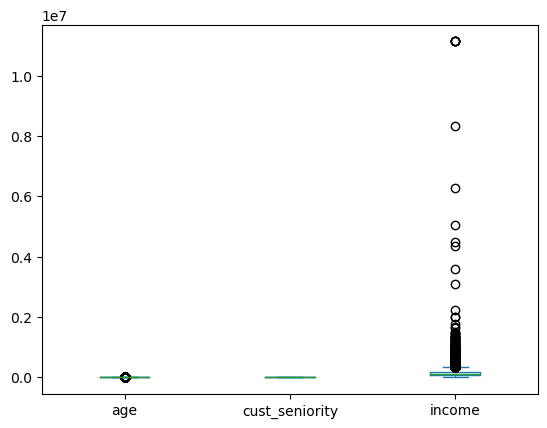

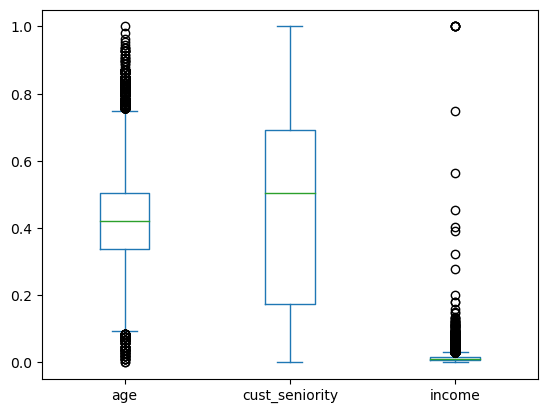

In [37]:
#kanw normalize kai scale to train_balanced opote prokuptei to neo train_balanced_scale to opoio exei diplasious users apo osous exoun to proion kai einai kai scaled

train_balanced_scaled=train_balanced


agetype=train_balanced_scaled['age'].dtype
print(agetype)
max_age = train_balanced_scaled['age'].max()
print('Maximum age:', max_age)
min_age = train_balanced_scaled['age'].min()
print('Minimum age:', min_age)

cust_seniority_type=train_balanced_scaled['cust_seniority'].dtype
print(cust_seniority_type)
max_cust_seniority = train_balanced_scaled['cust_seniority'].max()
print('Maximum cust_seniority:', max_cust_seniority)
min_cust_seniority = train_balanced_scaled['cust_seniority'].min()
print('Minimum cust_seniority:', min_cust_seniority)

income_type=train_balanced_scaled['income'].dtype
print(income_type)
max_income = train_balanced_scaled['income'].max()
print('Maximum income:', max_income)
min_income = train_balanced_scaled['income'].min()
print('Minimum income:', min_income)

import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select the categorical columns to scale
cols_to_scale = ['age', 'cust_seniority', 'income']

# Create a boxplot or histogram to check for outliers
train_balanced_scaled[cols_to_scale].plot(kind='box')

# Identify the outliers using the IQR method
Q1 = train_balanced_scaled[cols_to_scale].quantile(0.25)
Q3 = train_balanced_scaled[cols_to_scale].quantile(0.75)
IQR = Q3 - Q1
outliers = (train_balanced_scaled[cols_to_scale] < (Q1 - 1.5 * IQR)) | (train_balanced_scaled[cols_to_scale] > (Q3 + 1.5 * IQR))

# Normalize the data using standardization
scaler = StandardScaler()
train_balanced_scaled[cols_to_scale] = scaler.fit_transform(train_balanced_scaled[cols_to_scale])

# Scale the data using min-max scaling
min_max_scaler = MinMaxScaler()
train_balanced_scaled[cols_to_scale] = min_max_scaler.fit_transform(train_balanced_scaled[cols_to_scale])

# Create a boxplot or histogram to check for outliers
train_balanced_scaled[cols_to_scale].plot(kind='box')

int32
Maximum age: 116
Minimum age: 2
int32
Maximum cust_seniority: 246
Minimum cust_seniority: 1
int32
Maximum income: 28894395
Minimum income: 0


<AxesSubplot:>

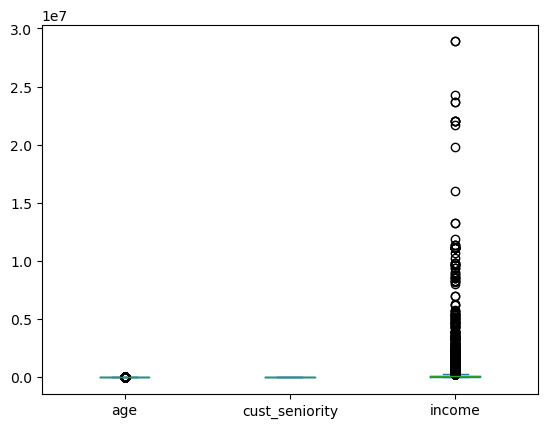

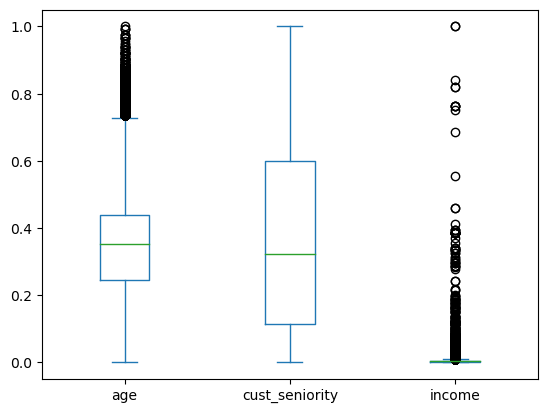

In [38]:
#kanw normalize kai scale to train opote prokuptei to neo train_scaled to opoio exei osous users eixe kai to arxiko train (peripou 312.000) kai einai kai scaled


train_scaled=train


agetype=train_scaled['age'].dtype
print(agetype)
max_age = train_scaled['age'].max()
print('Maximum age:', max_age)
min_age = train_scaled['age'].min()
print('Minimum age:', min_age)

cust_seniority_type=train_scaled['cust_seniority'].dtype
print(cust_seniority_type)
max_cust_seniority = train_scaled['cust_seniority'].max()
print('Maximum cust_seniority:', max_cust_seniority)
min_cust_seniority = train_scaled['cust_seniority'].min()
print('Minimum cust_seniority:', min_cust_seniority)

income_type=train_scaled['income'].dtype
print(income_type)
max_income = train_scaled['income'].max()
print('Maximum income:', max_income)
min_income = train_scaled['income'].min()
print('Minimum income:', min_income)

import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select the categorical columns to scale
cols_to_scale = ['age', 'cust_seniority', 'income']

# Create a boxplot or histogram to check for outliers
train_scaled[cols_to_scale].plot(kind='box')

# Identify the outliers using the IQR method
Q1 = train_scaled[cols_to_scale].quantile(0.25)
Q3 = train_scaled[cols_to_scale].quantile(0.75)
IQR = Q3 - Q1
outliers = (train_scaled[cols_to_scale] < (Q1 - 1.5 * IQR)) | (train_scaled[cols_to_scale] > (Q3 + 1.5 * IQR))

# Normalize the data using standardization
scaler = StandardScaler()
train_scaled[cols_to_scale] = scaler.fit_transform(train_scaled[cols_to_scale])

# Scale the data using min-max scaling
min_max_scaler = MinMaxScaler()
train_scaled[cols_to_scale] = min_max_scaler.fit_transform(train_scaled[cols_to_scale])

# Create a boxplot or histogram to check for outliers
train_scaled[cols_to_scale].plot(kind='box')

In [39]:
#TEST OF EUCLIDEAN
##edw upologizw euclidean exontas kanei normalization kai min max scaling toso se train (train-->train_scaled) oso kai se train_balanced (train_balanced-->train_balanced_scaled)
# alla exontas kanei balance to train apo to opoio epilegw tous 1000 customers
#kai dixws na exw kanei balance to train mou sto opoio upologizw tis apostaseis tou kathe enos customer me tous 1000 pou epilexthkan tuxaia apo to train_balanced_scaled 


#train_scaled  einai to original me 300.000 alla scaled
#train_balanced_scaled  einai to balanced me tous diplasious apo osous exoun to proion alla scaled
#-----------------------------------------------------------------------------------------------------------------------
from sklearn.metrics.pairwise import euclidean_distances

# Select 10,000 random customers from the !train_balanced!
num_customers = 1000
selected_customers = train_balanced_scaled.sample(n=num_customers, random_state=42)
cust_codes_1000=selected_customers['cust_code']
list_of1000 = cust_codes_1000.tolist()
#print(selected_customers)
#print(cust_codes_1000)


# Calculate the Euclidean distance between the 1000 selected customers from train_balanced_scaled and themselves
selected_customers_distances = euclidean_distances(selected_customers.drop([product, 'cust_code'], axis=1))

all_customers_distances = []

# Calculate the Euclidean distance between every row in the original dataframe (aka train_scaled) and the selected customers from train_balanced_scaled
for i, row in train_scaled.iterrows():
    if i in selected_customers.index:
        # Skip selected customers (including themselves)
        continue
    #row_distances = euclidean_distances(row.drop(product).values.reshape(1, -1), selected_customers.drop(product, axis=1))
    row_distances = euclidean_distances(row.drop([product, 'cust_code']).values.reshape(1, -1), selected_customers.drop([product, 'cust_code'], axis=1))
    all_customers_distances.append(row_distances)

# Combine the distances into a single matrix
all_customers_distances = np.concatenate(all_customers_distances)

# Combine the selected customers distances with the rest of the customers
distances = np.concatenate((selected_customers_distances, all_customers_distances), axis=0)

# Calculate the similarities
similarities = 1 / (1 + distances)

# Print the similarity matrix
print(similarities)

print(similarities.shape)

[[1.         0.23962577 0.28827517 ... 0.30763123 0.2891817  0.30760273]
 [0.23962577 1.         0.25962319 ... 0.30353455 0.28938914 0.30468947]
 [0.28827517 0.25962319 1.         ... 0.30426782 0.28925455 0.30803363]
 ...
 [0.28965553 0.2874505  0.28800016 ... 0.49706184 0.77212066 0.49509635]
 [0.32893469 0.25835062 0.41323102 ... 0.35616802 0.33053489 0.36419664]
 [0.25894182 0.28547613 0.26092869 ... 0.35488655 0.33009293 0.36359935]]
(312913, 1000)


In [ ]:
similarities_df = pd.DataFrame(similarities, columns=list_of1000)
CUST_CODES_DF=CUST_CODES_DF.astype('int')
print(CUST_CODES_DF.head(5))
print(list_of1000)
print(similarities_df.head(5))

In [49]:
print(similarities_df.shape)


(312913, 1000)


In [52]:


# assume `similarities_df` is your original DataFrame of shape 312913x1000

# find the threshold value for the top 10% of the values in each row
thresholds = similarities_df.quantile(q=0.9, axis=1)

# create a new DataFrame to store the top 10% values
top_10_percent_df = pd.DataFrame(index=similarities_df.index)

# iterate over each row and select columns with values above the threshold
for i, row in similarities_df.iterrows():
    top_columns = row[row >= thresholds[i]].index
    top_10_percent_df = pd.concat([top_10_percent_df, similarities_df.loc[i, top_columns]], axis=1)

# rename columns with their cust_code
top_10_percent_df.columns = similarities_df.columns[top_10_percent_df.columns]

# sort the columns by their cust_code
top_10_percent_df = top_10_percent_df.reindex(sorted(top_10_percent_df.columns), axis=1)


In [41]:
stop

NameError: name 'stop' is not defined

In [ ]:
# assume `similarities` is your original ndarray of shape 312913x1000
# and `cust_codes` is the list of cust_codes for the 1000 selected customers

# create a new 2D array of tuples
similarity_tuples = np.empty(similarities.shape, dtype=[('similarity', 'float'), ('cust_code', 'int')])
similarity_tuples['similarity'] = similarities
similarity_tuples['cust_code'] = np.array(list_of1000)

# convert the similarity_tuples array to a pandas DataFrame
similarities_with_custcode_df = pd.DataFrame(similarity_tuples.tolist(), index=similarities.index, columns=similarities.columns)


In [ ]:
'''# assume `similarities` is your original DataFrame of shape 312913x1000
# and `cust_codes` is the list of cust_codes for the 1000 selected customers

# create a new DataFrame to store the similarities with cust_codes
similarities_with_custcode = pd.DataFrame(index=similarities.index, columns=similarities.columns)

# iterate over each row and column to append cust_code to similarity value
for i, row in similarities.iterrows():
    for j, similarity in row.iteritems():
        cust_code = list_of1000[j]
        similarities_with_custcode.loc[i, j] = [similarity, cust_code]

'''

# assume `similarities` is your original ndarray of shape 312913x1000
# and `cust_codes` is the list of cust_codes for the 1000 selected customers

# create a new ndarray to store the similarities with cust_codes
similarities_with_custcode = np.empty_like(similarities, dtype=object)

# iterate over each row and column to append cust_code to similarity value
for i in range(similarities.shape[0]):
    for j in range(similarities.shape[1]):
        similarity = similarities[i][j]
        cust_code = list_of1000[j]
        similarities_with_custcode[i][j] = [similarity, cust_code]

# convert the similarities_with_custcode ndarray to a pandas DataFrame
similarities_with_custcode_df = pd.DataFrame(similarities_with_custcode, index=similarities.index, columns=similarities.columns)




In [ ]:
STOP

NameError: name 'STOP' is not defined

# **apo dw kaikatw peritta ola gia thn euclidea**

In [ ]:
features_list=['country',
'sex',
'age', 
'new_cust',
'cust_seniority',
'indrel',
'residence_index',        
'foreigner_index',
'deceased',                       
'activity_index',
'income',
'savings_account',
'guarentees', 
'current_account',
'derivative_account',
'payroll_account',
'junior_account', 
'mas_account',
'perticular_account',
'perticular_plus',
'st_deposit', 
'mt_deposits',
'lt_deposits',
'e_account',
'funds',
'mortgage', 
'pension', 
'loan',
'tax', 
'credit_card',
'securities',
'home_account',
'payroll',
'pension2', 
'direct_debit',
'emp_index_D',
'emp_index_B',
'emp_index_C',
'emp_index_A', 
'emp_index_E', 
'cust_type_1', 
'cust_type_3', 
'cust_type_2',
'cust_rel_I',
'cust_rel_A',
'cust_rel_P', 
'segmentation_2', 
'segmentation_3', 
'segmentation_1']
features_list.remove(product)
#features_list=['country','sex','age','new_cust','cust_seniority','indrel','residence_index','foreigner_index','deceased','activity_index','income','emp_index_D','emp_index_B','emp_index_C','emp_index_A','emp_index_E','cust_type_1','cust_type_3','cust_type_2','cust_rel_I','cust_rel_A','cust_rel_P','segmentation_2','segmentation_3','segmentation_1']
# split the data into features (X) and target (y)
features_train = train1[features_list]
target_train = train1[product]


features_test=test.drop(columns=product) 
target_test=test[product]



**STO EPOMENO CELL TREXW MAZIKA GIA !ENA PROION! POU EXW HDH EPILEKSEI PROHGOUMENWS KAI EXEI GINEI BALANCE TO TRAIN DATASET, OLES TIS DIAFORETIKES PARAMETROUS. TA paotelesmata ta grafw se ena pandas df to opoiw to apothikeuw sto telos**

In [ ]:
#vazw ta CUST_CODES_DF ws prwth sthlh ksana sto test kai sto apotelesma vazw ws teleutaia sthlh tis provlepseis

df_concat = pd.concat([CUST_CODES_DF, test], axis=1)
df_concat_original_pred=pd.concat([df_concat, predictions_df], axis=1)
'''count=0
for every row of df_concat_original+pred:
    if df_concat_original+pred['cust_code'] in list(CUST_CODES_0_1_DF):
        if df_concat_original_pred[product]==df_concat_original_pred[predictions]:
            count+=1
print(the accuracy of the model otan provlepei th metavash apo 0->1 einai count/len(list(CUST_CODES_0_1_DF)))'''

NameError: name 'predictions_df' is not defined

In [ ]:
print(type(df_concat_original_pred))
print(df_concat_original_pred.head(5))
print(len(df_concat_original_pred))

<class 'pandas.core.frame.DataFrame'>
   cust_code  country  sex  age  new_cust  cust_seniority  indrel  \
0  1375586.0        1    1   35         0               6       1   
1  1050614.0        1    0   23         0              35       1   
2  1050617.0        1    1   23         0              35       1   
3  1050623.0        1    1   23         0              35       1   
4  1050624.0        1    1   65         0              35       1   

   residence_index  foreigner_index  deceased  activity_index  income  \
0                1                0         0               1   87218   
1                1                0         0               1       0   
2                1                0         0               1  113316   
3                1                0         0               1  113538   
4                1                0         0               1   61605   

   savings_account  guarentees  current_account  derivative_account  \
0                0           0       

In [ ]:
#swzw to teliko df (prokeitai gia to test alla mesa exei kai ta cust_codes kai ta predictions ws prwth kai teleutaia sthlh antistoixa)
#file_path='C:/Users/Y9FHP3726/Desktop/ANDREAS/DiplomaThesis/experiments/DecisionTreeResults/03052023_0_1_month_by_product_results/03052023_0_1_month_results_Decision_Tree_'+product+'.csv'
#df_concat_original_pred.to_csv(file_path, index=False)

In [ ]:

# List of specific cust_code values to check
cust_code_list = CUST_CODES_0_1_DF['cust_code'].tolist()
#print(cust_code_list)
#print(len(cust_code_list))



# Check if rows with cust_code in cust_code_list have the same value in 'product' and 'prediction'
mask = df_concat_original_pred['cust_code'].isin(cust_code_list) & (df_concat_original_pred[product] == df_concat_original_pred['predictions'])
result = df_concat_original_pred[mask]

# Print the result
#print(len(result))
#print(type(result))
#print(result.head(5))
print ('the model predicted that out of', len(cust_code_list), 'customers that actually bought the product: ', product, 'during the time period between train and test, the ', len(result), 'would have bought it,')
print('which means that the accuracy is:', len(result)/len(cust_code_list))


the model predicted that out of 414 customers that actually bought the product:  funds during the time period between train and test, the  223 would have bought it,
which means that the accuracy is: 0.538647342995169


In [ ]:
'''from sklearn.tree import DecisionTreeClassifier
# create a DecisionTreeClassifier model
model = DecisionTreeClassifier( criterion='gini', max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=40)

# fit the model to the data
model.fit(features_train, target_train)
'''

"from sklearn.tree import DecisionTreeClassifier\n# create a DecisionTreeClassifier model\nmodel = DecisionTreeClassifier( criterion='gini', max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=40)\n\n# fit the model to the data\nmodel.fit(features_train, target_train)\n"

In [ ]:
'''# make predictions on new data

# predict class labels for the testing set
predictions = model.predict(features_test)

y_pred_prob = model.predict_proba(features_test)

# print the predicted values
print('The predictions are:')
print(predictions)
'''

"# make predictions on new data\n\n# predict class labels for the testing set\npredictions = model.predict(features_test)\n\ny_pred_prob = model.predict_proba(features_test)\n\n# print the predicted values\nprint('The predictions are:')\nprint(predictions)\n"

# **SKLEARN METRICS**

In [ ]:
'''from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score

# compute AUC score
auc = roc_auc_score(target_test, y_pred_prob[:, 1])
print("ROC AUC on test data: {:.4f}".format(auc))

# compute accuracy score
accuracy = accuracy_score(target_test, predictions)
print("Accuracy: {:.4f}".format(accuracy))

# compute precision score
precision = precision_score(target_test, predictions)
print("Precision: {:.4f}".format(precision))

# compute recall score
recall = recall_score(target_test, predictions)
print("Recall: {:.4f}".format(recall))'''




'from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score\n\n# compute AUC score\nauc = roc_auc_score(target_test, y_pred_prob[:, 1])\nprint("ROC AUC on test data: {:.4f}".format(auc))\n\n# compute accuracy score\naccuracy = accuracy_score(target_test, predictions)\nprint("Accuracy: {:.4f}".format(accuracy))\n\n# compute precision score\nprecision = precision_score(target_test, predictions)\nprint("Precision: {:.4f}".format(precision))\n\n# compute recall score\nrecall = recall_score(target_test, predictions)\nprint("Recall: {:.4f}".format(recall))'

In [ ]:
'''#CONFUSION MATRIX
from sklearn.metrics import  confusion_matrix

y_true = target_test
y_pred = predictions

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Set the ticks and tick labels
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Class 0', 'Class 1'],
       yticklabels=['Class 0', 'Class 1'],
       title='Confusion matrix of product: '+product,
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
fmt = '.2f'  # Format for displaying the numbers in the cells
thresh = cm.max() / 2.  # Threshold for coloring the cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Add a grid to the plot
ax.grid(False)

# Display the plot
plt.show()'''

'#CONFUSION MATRIX\nfrom sklearn.metrics import  confusion_matrix\n\ny_true = target_test\ny_pred = predictions\n\n# Create the confusion matrix\ncm = confusion_matrix(y_true, y_pred)\n\n# Plot the confusion matrix\nfig, ax = plt.subplots()\nim = ax.imshow(cm, interpolation=\'nearest\', cmap=plt.cm.Blues)\nax.figure.colorbar(im, ax=ax)\n\n# Set the ticks and tick labels\nax.set(xticks=np.arange(cm.shape[1]),\n       yticks=np.arange(cm.shape[0]),\n       xticklabels=[\'Class 0\', \'Class 1\'],\n       yticklabels=[\'Class 0\', \'Class 1\'],\n       title=\'Confusion matrix of product: \'+product,\n       ylabel=\'True label\',\n       xlabel=\'Predicted label\')\n\n# Rotate the tick labels and set their alignment\nplt.setp(ax.get_xticklabels(), rotation=45, ha="right",\n         rotation_mode="anchor")\n\n# Loop over data dimensions and create text annotations\nfmt = \'.2f\'  # Format for displaying the numbers in the cells\nthresh = cm.max() / 2.  # Threshold for coloring the cells\nf